# Final Project Module 1
### Exploratory Data Analysis and Descriptive Statistics

* Student name: Natalia Quintero E.
* Student pace: Full time
* Scheduled project review date/time: Friday, December 21, 2018. 1:00pm PST
* Instructor name: Rafael Carrasco
* Blog post URL: <font color='red'>blog url here</font>

_________________________
Sections - Following the OSEMiN framework
<ul><li>Introduction - dataset familirization- column meaning and accuracy</li>
    <li>Data cleaning - scrub</li> 
    <li>Exploration - Data analysis: understand distributions - calculate basic descriptive stats - no hypothesis is being tested, no predictions attempted</li>
    <li>Modeling (linear regression): at least 3 meaningful questions - relationships</li>
    <li>Interpretation - Visualization: at least 4, with interpretations - Summarise - present findings - recomendations</li>
    <li>Sources</li></ul>


## INTRODUCTION

This project attepts to predict the sale price of houses in King County, WA State.<br>
The data set has been provided in the form of a kc_house_data.csv file. Project requirements and expected observations from this study can be found in the index.ipynb file.

<font color='red'>add model information, describe location</font>

Import libraries needed and data set:

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

An initial look at the dataframe:

In [129]:
df = pd.read_csv('kc_house_data.csv')  
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Data set information

In [130]:
# make sure the data structure is a dataframe
type(df)

pandas.core.frame.DataFrame

In [131]:
df.info()     #21,597 records and 21 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [132]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Familiarize with the columns: a file (column_names.md) was provided with a short definition for each column; the contents of this file were confronted with information displayed for each house in the King County Parcel Viewer website, some descriptions have been complemented or changed in order to have more accurate information. 
Below there is a screen shot of the first house in the dataframe and the information displayed on King County's website.

<img src="DF_0.png">
<font color='red'>add source</font>

### Column names and description
* **id:** unique identified for a house - Parcel Number
* **date:** date a house was sold
* **price:** price prediction target
* **bedrooms:** number of bedrooms/house
* **bathrooms:** number of bathrooms/house
* **sqft_living:** living sq. footage of the home. Total finished living space. This would include finished space in a basement 
* **sqft_lot:** sqr. footage of the lot. A lot is a piece of land with specific boundaries.
* **floors:** number of floors (levels) in house
* **waterfront:** <strike>house which has a view to a waterfront</strike> a property located in the waterfront
* **view:** <strike>has been viewed</strike> refers to territorial views (water, mountains, partial)
* **condition:** relative to age and grade. Coded 1-5 
    1. Poor/worn out. Approaching abandonment or major recosntruction, effective age near the end 
    2. Fair/badly worn. Much repair needed, inadequate building utility and systems.
    3. Average. A few minor repairs needed. All major components are still functional. 
    4. Good. No obvious maintenance required but neither is everything new.


* **grade:** classification by construction quality which refers to the types of materials used and the quality of workmanship. Grades run from 1 to 13. 

    * 1-3 Falls short of minimum building standards. Normally cabin or inferior structure
    * 4	Generally older, low quality construction. Does not meet code.
    * 5	Low construction costs and workmanship. Small, simple design.
    * 6	Lowest grade currently meeting building code. Low quality materials and simple designs.
    * 7	Average grade of construction and design. Commonly seen in plats and older sub-divisions.
    * 8	Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
    * 9	Better architectural design with extra interior and exterior design and quality.
    * 10	Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
    * 11	Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
    * 12	Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
    * 13	Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.


* **sqft_above:** ABOVE GRADE LIVING AREA; AGLA. The living area in a house not including the basement. 
* **sqft_basement:** square footage of the basement
* **yr_built:** year the house was built
* **yr_renovated:** year the house was renovated
* **zipcode:** address zip code 
* **lat:** latitude coordinate
* **long:** longitude coordinate
* **sqft_living15:** the square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15:** the square footage of the land lots of the nearest 15 neighbors

Observations:
* Missing or NaN values in waterfornt, view, yr_renovated.
* Placeholders in sqft_basement
* By the definition of the columns,  we can see that there are two categorical columns (condition and grade). 
* Definition of the last two columns could not be verified

## DATA CLEANING

My aproach here is to check null values, placeholdersand type (for each column). <br>
Drop columns/rows that contain a large ammount of missing values.<br>
Replace/fill missing values where possible.<br>
Convert missing values as its own category, if necessary.<br>
Handle outliers. <br>

### NaN Values in the Dataframe
Check for total number of null values (NaN) in the dataset 

In [133]:
df.isna().sum()  # by column

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### waterfront


In [134]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [135]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

<img src="waterfront_comp.png">
<font color='red'>add source</font>

After a deep investigation about waterfront properties in King County, I came to the conclussion that it is better to drop this column. There are many missing values and the properties located at the waterfront (value = 1) are very few compared with the information displayed in the parcel viewer map tool which includes properties in the Puget Sound and around the many lakes in King County, therefore the number of properties on the waterfront should be higher.<br>

In [136]:
df.drop('waterfront', axis=1, inplace=True)

In [137]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### view

In [138]:
df['view'].unique()     # categorical data

array([ 0., nan,  3.,  4.,  2.,  1.])

In [139]:
# drop 63 rows 
df.dropna(subset=['view'], inplace=True)

In [140]:
# confirm values have been dropped and other values have not changed in the DF
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [141]:
# verify 
df['view'].unique()  

array([0., 3., 4., 2., 1.])

#### yr_renovated

In [142]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [143]:
df['yr_renovated'].isna().sum()

3830

Some values have already been removed as a result of the procedure above. For now, I will replace the nan with value=0, meaning that the house has not been renovated.<br> Keep in mind we also have the categorical <b>condition</b> column which provide us with insights about the condition of a house according to its age.

In [144]:
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0

In [145]:
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Confirm that there no NULL values in the dataframe:

In [146]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Datatype, Placeholders, Outliers

#### id
The id column is the parcel number assigned to each plot.

In [147]:
# This column will be left as it is
df['id'].dtypes

dtype('int64')

In [148]:
#df['id'].is_unique    #False
# Since this is a unique identifier for each house (parcel), we make it the index
df.set_index('id', inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### date

In [149]:
df['date'].dtypes

dtype('O')

In [150]:
# convert argument to datetime for possible manipulation later on
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [53]:
#df['date'].unique() # there are no placeholders in date column

#### price

In [151]:
df['price'].dtypes

dtype('float64')

In [20]:
# df['price'].value_counts()   # no placeholders in price column

#### bedrooms

In [152]:
df['bedrooms'].dtypes

dtype('int64')

In [153]:
df['bedrooms'].unique()   # possible outlier -> 33 bedrooms

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [154]:
# there is only one entry with 33 bedrooms, this is definetely an outlier, find more information about that entry
df['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [155]:
df.loc[df.bedrooms == 33]      # This entry will be removed

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [156]:
# remove outlier and confirm
df.drop(df[df.bedrooms == 33].index, inplace=True)
df['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

#### bathrooms

In [157]:
df['bathrooms'].dtypes   # full = 1, sink+toilet = 0.5, shower+sink+toilet = 0.75

dtype('float64')

In [158]:
df['bathrooms'].unique()  # no placeholders or outliers

array([1.  , 2.25, 3.  , 2.  , 4.5 , 2.5 , 1.75, 2.75, 1.5 , 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 0.5 , 5.5 , 6.75,
       6.  , 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

#### sqft_living

In [159]:
df['sqft_living'].dtypes 

dtype('int64')

In [103]:
#df['sqft_living'].value_counts()                  # no placeholders or outliers
#plt.scatter(df['sqft_living'], df['price'])
df['sqft_living'].max()                        # 13540, this number seems too large for a living space
#df['sqft_living'].min()
df.loc[df.sqft_living == 13540]         # a look at other values in this specific property          

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


Based on the information above I will not consider this an outlier and leave it as it is.

#### sqft_lot

In [160]:
df['sqft_lot'].dtypes 

dtype('int64')

In [161]:
#df['sqft_lot'].value_counts()    
#plt.scatter(df['sqft_lot'], df['price'])
df['sqft_lot'].max()   # 1651359
df.loc[df.sqft_lot > 1000000]   

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
1020069017,2015-03-27,700000.0,4,1.00,1300,1651359,1.0,3.0,4,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581
2623069031,2014-05-21,542500.0,5,3.25,3010,1074218,1.5,0.0,5,8,2010,1000.0,1931,0.0,98027,47.4564,-122.004,2450,68825
2323089009,2015-01-19,855000.0,4,3.50,4030,1024068,2.0,0.0,3,10,4030,0.0,2006,0.0,98045,47.4619,-121.744,1830,11700
3326079016,2015-05-04,190000.0,2,1.00,710,1164794,1.0,0.0,2,5,710,0.0,1915,0.0,98014,47.6888,-121.909,1680,16730


After checking a couple of times for max. values in this column I decided to check for sqft. greater than 1,000,000.<br>
This number seems extremely large but looking at the other variables and based on the fact that this is refering to a square footage of a piece of land it's normal to have that much property.

#### floors

In [162]:
df['floors'].dtypes     # dtype('float64')
df['floors'].unique()   # array([1. , 2. , 1.5, 3. , 2.5, 3.5])

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

#### condition

In [163]:
df['condition'].dtypes    # dtype('int64')
df['condition'].unique()

array([3, 5, 4, 1, 2])

#### grade

In [164]:
df['grade'].dtypes      # dtype('int64')
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

#### sqft_above

In [165]:
df['sqft_above'].dtypes      # dtype('int64')
#df['sqft_above'].unique()    # no placeholders 

dtype('int64')

#### sqft_basement

In [166]:
df['sqft_basement'].dtypes               # dtype('O')
#df['sqft_basement'].value_counts()       # there are 454 placeholders (?)

dtype('O')

In [170]:
df.drop(df[df.sqft_basement == '?'].index, inplace=True)     # drop rows
#df['sqft_basement'].value_counts()                           # make sure there are not placeholders

In [197]:
df['sqft_basement'] = df.sqft_basement.astype('int')
df['sqft_basement'].dtypes
#df['sqft_basement'].value_counts()

dtype('int64')

#### yr_built

In [198]:
df['yr_built'].dtypes     # dtype('int64')
df['yr_built'].unique()   # no placeholders, this can be kept as int

array([1955, 1951, 1933, 1965, 1987, 2001, 1960, 2003, 1942, 1927, 1977,
       1900, 1979, 1994, 1916, 1969, 1947, 1968, 1995, 1985, 1941, 1915,
       1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000, 1984, 1922,
       1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973, 2014, 1925, 1989,
       1972, 1986, 1956, 1992, 1964, 1952, 1961, 2006, 1988, 1962, 1939,
       1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905, 1971, 2010, 1945,
       1924, 1990, 1914, 1926, 1923, 2007, 1976, 1949, 1999, 1901, 1993,
       1920, 1997, 1943, 1957, 2004, 1940, 1918, 1928, 1974, 1911, 1936,
       1937, 1982, 1908, 1931, 1963, 2002, 1998, 1913, 1921, 2013, 1907,
       1958, 2012, 1912, 2011, 1932, 1944, 1902, 2009, 1903, 1970, 2015,
       1934, 1938, 1919, 1917, 1906, 1935])

#### yr_renovated

In [177]:
df['yr_renovated'].dtypes     # dtype('float64')
df['yr_renovated'].unique()   # check for plaholders before casting
df['yr_renovated'] = df.yr_renovated.astype('int')

In [179]:
df['yr_renovated'].dtypes     # dtype('int64')
df['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984,
       1954, 2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000,
       1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 1980,
       1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008, 1968,
       2012, 1963, 1951, 1962, 2001, 1953, 1993, 1996, 1955, 1982, 1956,
       1940, 1976, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965, 1934,
       1972, 1944, 1958])

#### zipcode

In [183]:
df['zipcode'].dtypes     #dtype('int64')
df['zipcode'].unique()
# nothing to do here, everything looks fine

array([98178, 98125, 98028, 98136, 98074, 98053, 98146, 98038, 98007,
       98115, 98107, 98126, 98019, 98103, 98003, 98133, 98040, 98092,
       98030, 98002, 98119, 98112, 98052, 98027, 98117, 98058, 98001,
       98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059,
       98122, 98144, 98004, 98005, 98034, 98075, 98116, 98118, 98199,
       98032, 98045, 98102, 98077, 98198, 98108, 98168, 98177, 98029,
       98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98010,
       98106, 98072, 98188, 98065, 98014, 98055, 98039])

#### lat and long

In [190]:
df['lat'].dtypes    # dtype('float64')
#df['lat'].value_counts()

dtype('float64')

In [194]:
df['long'].dtypes    # dtype('float64')
#df['long'].unique()

dtype('float64')

#### sqft_living15 and sqft_lot15

In [201]:
df['sqft_living15'].dtype     # dtype('int64')
#df['sqft_living15'].unique()  # no placeholders

dtype('int64')

In [207]:
df['sqft_lot15'].dtype      # dtype('int64')
#df['sqft_lot15'].unique()   # no placeholders

dtype('int64')

Checking our dataframe info:

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21077 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
date             21077 non-null datetime64[ns]
price            21077 non-null float64
bedrooms         21077 non-null int64
bathrooms        21077 non-null float64
sqft_living      21077 non-null int64
sqft_lot         21077 non-null int64
floors           21077 non-null float64
view             21077 non-null float64
condition        21077 non-null int64
grade            21077 non-null int64
sqft_above       21077 non-null int64
sqft_basement    21077 non-null int64
yr_built         21077 non-null int64
yr_renovated     21077 non-null int64
zipcode          21077 non-null int64
lat              21077 non-null float64
long             21077 non-null float64
sqft_living15    21077 non-null int64
sqft_lot15       21077 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(12)
memory usage: 3.2 MB


In [209]:
df.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0.0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925


### Checking for Multicollinearity

After removing NULL values from the dataset, I'd like to know how the variables are correlated and if some columns can be dropped.

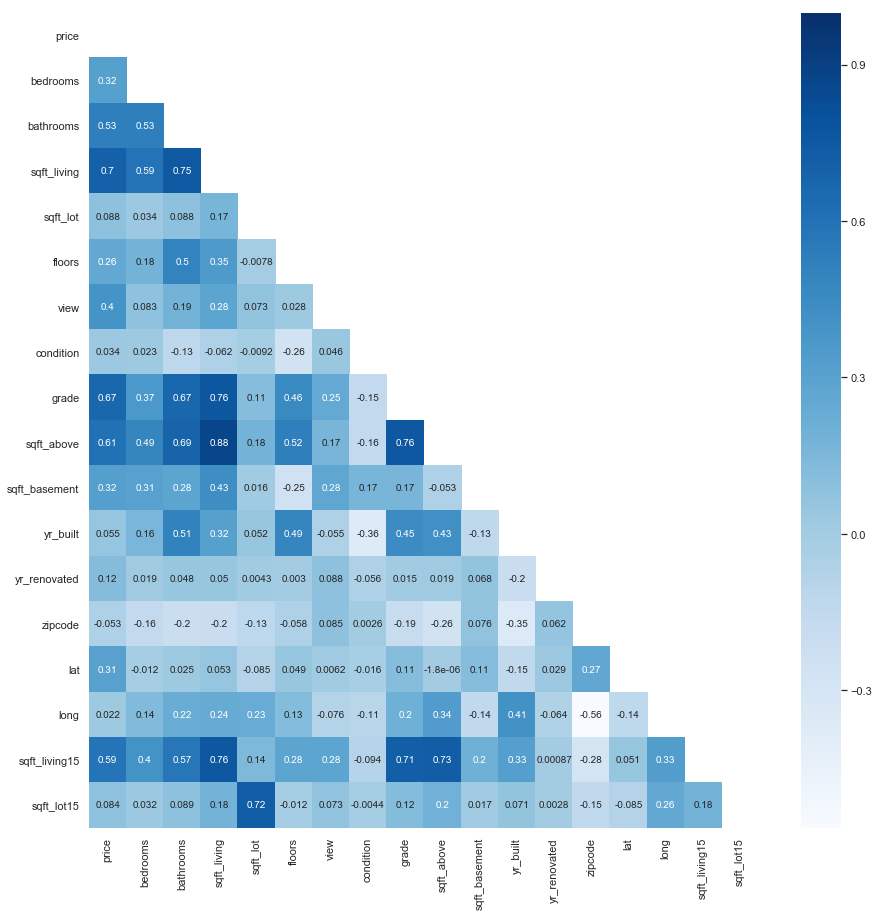

In [210]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

#Compute the correlation matrix
corr = df.corr()

# Generate mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up matplotlib figure
f, ax=plt.subplots(figsize=(15,15))

#Generate heat map
sns.heatmap(corr, cmap="Blues", annot=True, mask=mask);

## EXPLORATION

## MODELING

## INTERPRETATION

## SOURCES

<p>Pandas: Python library designed to work  with relational data. Used to store files in the form of DataFrames</p>
<p><a href = "https://blue.kingcounty.com/Assessor/eRealProperty/ResidentialGlossary.aspx?idx=viewall&Parcel=2767602490&AreaReport=http://www.KingCounty.gov/depts/Assessor/Reports/area-reports/2018/residential-northwest/019.aspx">King County glossary of terms for residential parcels</a></p>
<p><a href= "https://kingcounty.gov/services/gis/Maps/parcel-viewer.aspx">King County Parcel Viewer and Information